<a href="https://colab.research.google.com/github/pooja251096/Netflix-Movies-and-Tv-shows-clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# **1. Import Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import the required libraries
import scipy

import math
import random
import sklearn

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

from matplotlib import rcParams

import warnings
from sklearn import preprocessing
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

from time import time
import keras.backend as K

from tensorflow.keras.layers import Layer, InputSpec
#from keras.layers import Dense, Input, Embedding
from keras.models import Model
from tensorflow.keras.optimizers import SGD
#from keras import callbacks
#from keras.initializers import VarianceScaling
from sklearn.cluster import KMeans,DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

%matplotlib inline




from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import OPTICS
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from sklearn.cluster import Birch


import numpy as np
import scipy
import pandas as pd
import math
import random
import sklearn
#from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MinMaxScaler

from time import time

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline


#https://www.analyticsvidhya.com/blog/2022/01/from-word-embedding-to-documents-embedding-without-any-training/
import re
import string

import math
from numpy import array 
import nltk
from nltk.tokenize import word_tokenize

from sklearn.cluster import KMeans
from collections import Counter 
from nltk.corpus import stopwords 
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift
from sklearn.cluster import  estimate_bandwidth


import tensorflow as tf
import tensorflow_hub as hub

!pip3 install --upgrade tensorflow-gpu >> /dev/null
# Install TF-Hub.
!pip3 install tensorflow-hub >> /dev/null

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


# **2. Import Data**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Almabetter learning/Book Recommendation/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [ ]:
# Display first few records
data.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

# **3. Elementary Analysis**

In [ ]:
# Display column information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


All the columns are of object type, except for the release_year which is integer.

In [ ]:
# Display shape of data
data.shape

(7787, 12)

The dataset has around 7500 records and 12 columns.

In [ ]:
# Check null values
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

We can observe some null values in columns like director, cast, sountry etc. We will process them before fitting any model.

In [ ]:
# Descriptive statistics
data.describe()

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

As release year is the only integer type column, we check the descriptive statistics of release year.

In [ ]:
# Descriptive statistics for object type columns
data.describe(include=['object'])

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   

              country       date_added rating  duration      listed_in  \
count            7280             7777   7780      7787           7787   
unique            681             1565     14       216            492   
top     United States  January 1, 2020  TV-MA  1 Season  Documentaries   
freq             2555              118   2863      1608            334   

                                              description  
count                                                7787  
unique                                               7769  
top     Multiple women report their husbands as missin...  
freq                                                    3

We analyze the descriptive statistics for the object type columns.

## **4. Data Cleaning and data Visualization**

In [ ]:
# Null value hadling
data['director'].fillna('No Director', inplace=True)
data['cast'].fillna('No Cast', inplace=True)
data['country'].fillna('Country Unavailable', inplace=True)
data.dropna(subset=['date_added','rating'],inplace=True)

Null value records are replaced with some strings so that it can provide some insights in our initial data analysis.

In [ ]:
# Re-check presence of nulls
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

After replacing null values, we recheck if any null values are present.

In [ ]:
df=data.copy()

**Netflix Content By Type**

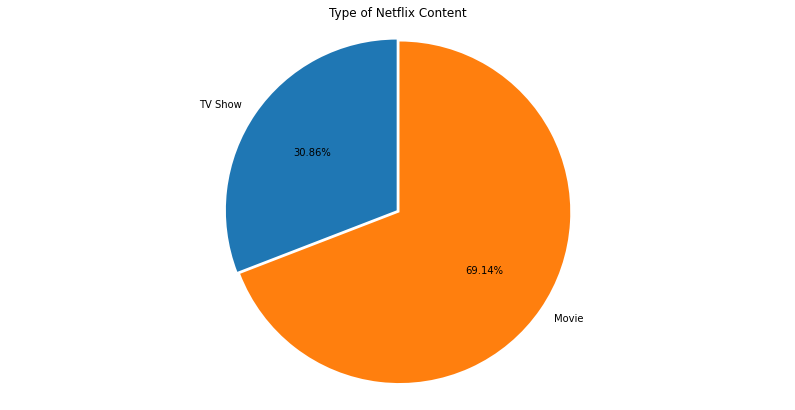

In [ ]:
#Plotting pie chart on type feature
plt.figure(figsize=(14, 7))
labels=['TV Show', 'Movie']
plt.pie(df['type'].value_counts().sort_values(),labels=labels,explode=[0.01,0.01],
        autopct='%1.2f%%', startangle=90)
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.show()

Type of Content on Netflix

30.4 % TV Show and 69.6% Movie Content.
The content type with most listings on Netflix is movies.

# **Production Growth based on type of the content & release_year**

In [ ]:
# Create dataframes for TV Show and Movie
yearly_movies=df[df.type =='TV Show']['release_year'].value_counts().sort_index(ascending=False).head(15)
yearly_shows=df[df.type =='Movie']['release_year'].value_counts().sort_index(ascending=False).head(15)
total_content=df['release_year'].value_counts().sort_index(ascending=False).head(15)

New DataFrames where data for the TV Show and the Movie are segregated for better EDA.

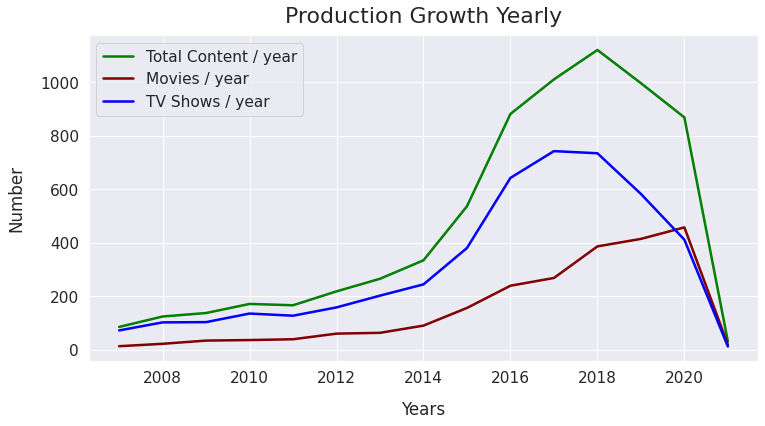

In [ ]:
#PLot the number of movies across years
sns.set(font_scale=1.4)
total_content.plot(figsize=(12, 6), linewidth=2.5, color='green',label="Total Content / year")
yearly_movies.plot(figsize=(12, 6), linewidth=2.5, color='maroon',label="Movies / year",ms=3)
yearly_shows.plot(figsize=(12, 6), linewidth=2.5, color='blue',label="TV Shows / year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.legend()
plt.title("Production Growth Yearly", y=1.02, fontsize=22);

This plot shows the number of contents uploaded for TV Show or movies. We can see that the number of uploads for both the categories started increasing significantly after 2014.

# **Release_year**


Let's see all unique values present in release_year

In [ ]:
df['release_year'].unique()

array([2020, 2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2015,
       2010, 2005, 2013, 2012, 2006, 2000, 2003, 1989, 2004, 1977, 1971,
       1993, 2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974,
       2001, 1999, 1966, 1991, 1982, 1994, 1995, 1978, 1992, 1972, 1975,
       2021, 1973, 1967, 1960, 1981, 1958, 1976, 1968, 1956, 1985, 1965,
       1984, 1983, 1987, 1945, 1946, 1962, 1925, 1942, 1969, 1955, 1963,
       1964, 1954, 1970, 1944, 1947, 1959, 1943])

In [ ]:
type(df['release_year'][0])

numpy.int64

In [ ]:
df['release_year'].value_counts().to_frame().T


2018  2017  2019  2016  2020  2015  2014  2013  2012  2010  ...  \
release_year  1120  1010   996   881   868   536   334   265   218   171  ...   

              1969  1963  1954  1970  1956  1925  1964  1966  1947  1959  
release_year     2     2     2     2     2     1     1     1     1     1  

[1 rows x 73 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


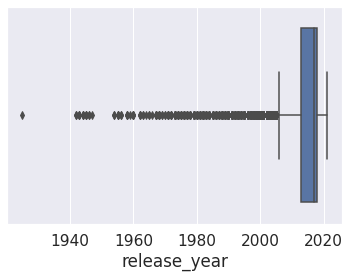

In [ ]:
# Box plot for release year
sns.boxplot(df.release_year)

As we have seen earlier before 2014 the production growth for Movies & Tv Shows were very less ,that's why it's showing those values as outliers

In [ ]:
#Get the IQR for release year
release_year_Q1 = df.release_year.quantile(0.25)
release_year_Q3 = df.release_year.quantile(0.75)
release_year_IQR = release_year_Q3 - release_year_Q1
print(f'release_year_Q1 = {release_year_Q1}\nrelease_year_Q3 = {release_year_Q3}\nrelease_year_IQR = {release_year_IQR}')

release_year_Q1 = 2013.0
release_year_Q3 = 2018.0
release_year_IQR = 5.0


In [ ]:
release_year_outliers = df[(df.release_year < (release_year_Q1 - 1.5 * release_year_IQR)) |
                           ( df.release_year > (release_year_Q3 + 1.5 * release_year_IQR)) ]

In [ ]:
np.percentile(df["release_year"],1)

1974.0

In [ ]:
#replacing outliers with means
df["release_year"] = np.where(df["release_year"] <2010, df.release_year.mean(),df['release_year'])

In [ ]:
df.release_year.describe()

count    7770.000000
mean     2016.349312
std         2.567764
min      2010.000000
25%      2013.935393
50%      2017.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


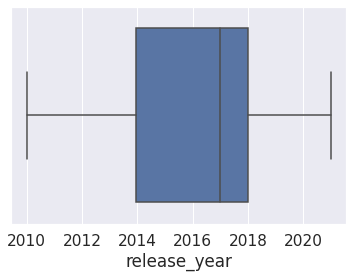

In [ ]:
#Box plot
sns.boxplot(df.release_year)


# **Title**

No of unique title present in title column

In [ ]:
df.title.nunique()

7770

In [ ]:
df.shape

(7770, 12)

All the values present in Title are unique

Most occured word in Title ??

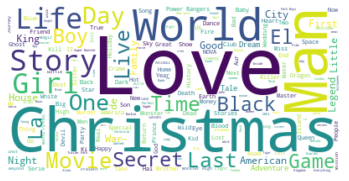

In [ ]:
#subsetting df
df_wordcloud = df['title']
text = " ".join(word for word in df_wordcloud)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

It seems like words like "Love", "Man", "World", "Story" , "Christmas" are very common in titles.

# **Countries producing most number of contents**

In [ ]:
df.country.nunique()

682

In [ ]:
df.country.value_counts().rename_axis('Country').reset_index(name='counts').T


0      1                    2               3      4    \
Country  United States  India  Country Unavailable  United Kingdom  Japan   
counts            2546    923                  505             396    224   

                 5       6      7       8      9    ...  \
Country  South Korea  Canada  Spain  France  Egypt  ...   
counts           183     177    134     115    101  ...   

                                       672  \
Country  United States, South Korea, Japan   
counts                                   1   

                                                       673  \
Country  Lebanon, United Arab Emirates, France, Switzer...   
counts                                                   1   

                                674                     675  \
Country  France, Australia, Germany  Ireland, United States   
counts                            1                       1   

                                    676                           677  \
Country  United States, Canada, Germany  Russia, United States, China   
counts                                1                             1   

                                         678  \
Country  Italy, Switzerland, France, Germany   
counts                                     1   

                                           679  \
Country  United States, United Kingdom, Canada   
counts                                       1   

                                          680  \
Country  United States, United Kingdom, Japan   
counts                                      1   

                                                       681  
Country  Sweden, Czech Republic, United Kingdom, Denmar...  
counts                                                   1  

[2 rows x 682 columns]

In [ ]:
# Create list for country wise production counts
country_list=[]
tv_show=[]
movies=[]
for i in range(0,len(df)):
  if isinstance(df['country'].iloc[i] , str):
    split=df['country'].iloc[i].split(',')
    for k in split:
      country_list.append(k.strip())
      if df['type'].iloc[i]=='TV Show':
        tv_show.append(k.strip())
      if df['type'].iloc[i]== 'Movie':
        movies.append(k.strip())
production_country=list(set([(i,country_list.count(i),tv_show.count(i),movies.count(i)) for i in country_list]))

In [ ]:
production_country[:5]

[('Belarus', 1, 1, 0),
 ('Japan', 285, 182, 103),
 ('Armenia', 1, 0, 1),
 ('Namibia', 2, 0, 2),
 ('Lebanon', 26, 7, 19)]

In [ ]:
#Convert the list to DataFrame
country_df= pd.DataFrame(production_country,columns=['country','Productions','TV-Shows','Movies']) 
country_df=country_df.sort_values('Productions',ascending=False)
country_df=country_df.reset_index()
country_df=country_df.drop('index',axis=1)

#Top 5 countries
top_countries=country_df.head()
top_countries

country  Productions  TV-Shows  Movies
0        United States         3288       860    2428
1                India          990        75     915
2       United Kingdom          722       255     467
3  Country Unavailable          505       276     229
4               Canada          412       126     286

A dataframe consisting of country wise productions has been created. United States has the most number of movies and TV Shows production.

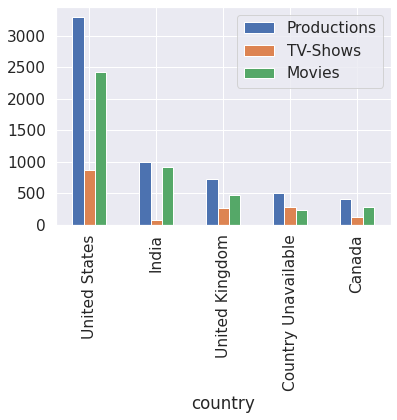

In [ ]:
#Plot the production of top countries
top_countries.head(9).plot(x="country", y=['Productions','TV-Shows','Movies'], kind="bar")


United States is the leader in producing content on Netflix and India is on second position

## Ratings

In [ ]:
#Count for unique ratings
df['rating'].value_counts().reset_index().rename(columns={'index': 'rating','rating':'counts'})

rating  counts
0      TV-MA    2861
1      TV-14    1928
2      TV-PG     804
3          R     665
4      PG-13     386
5       TV-Y     279
6      TV-Y7     270
7         PG     247
8       TV-G     194
9         NR      83
10         G      39
11  TV-Y7-FV       6
12        UR       5
13     NC-17       3

Calculate the counts for all the ratings

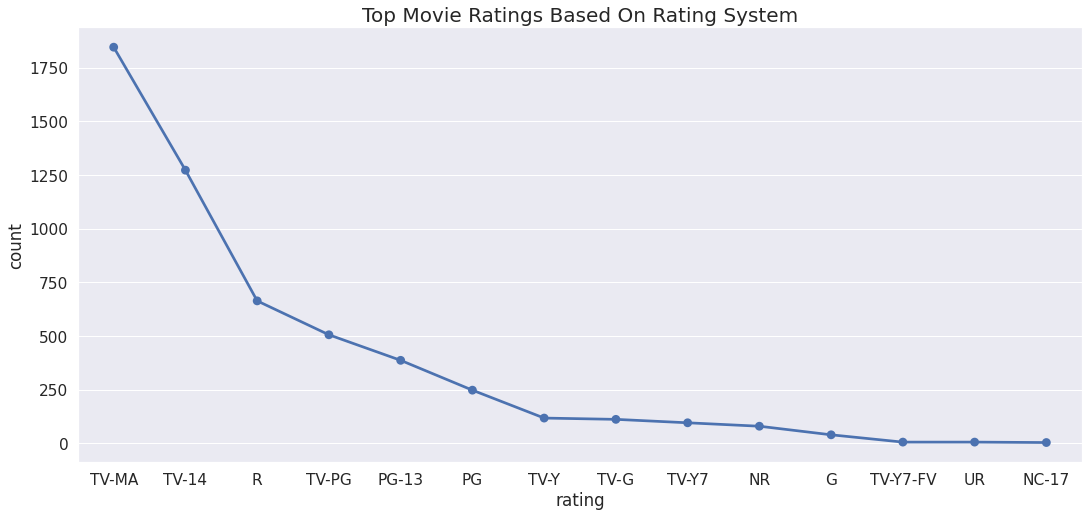

In [ ]:
#Divide the data
df_tv = df[df["type"] == "TV Show"]
df_movie = df[df["type"] == "Movie"]

#Plot the movie ratings
movie_ratings = df_movie.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,8)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=movie_ratings)
plt.title('Top Movie Ratings Based On Rating System',size='20')
plt.show()

We extract the data for Movies, then we plot the diffrent ratings. Mostly, TV-MA is the rating the users have given followed by TV-14. 

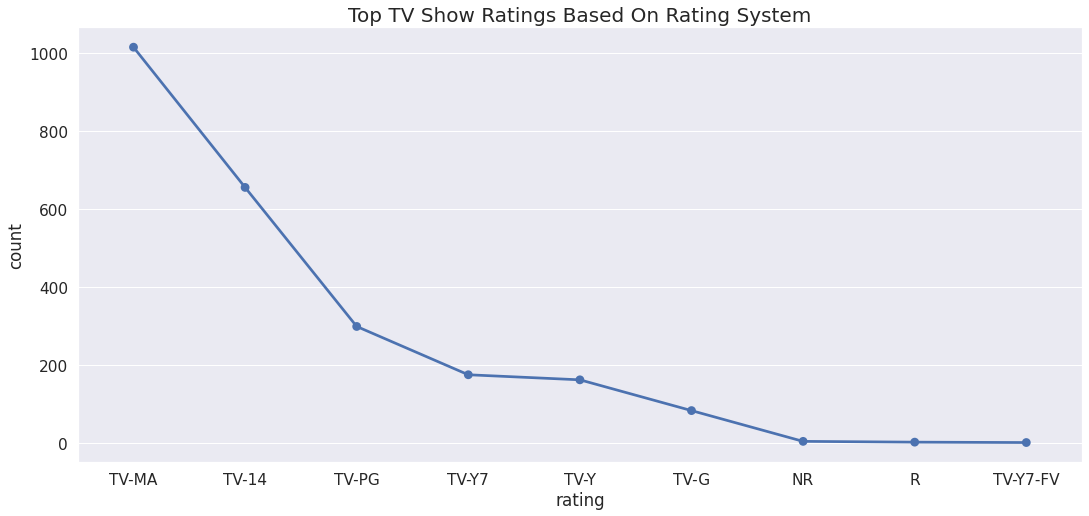

In [ ]:
#Plot the TV ratings
tv_ratings = df_tv.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,8)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top TV Show Ratings Based On Rating System',size='20')
plt.show()

#Genres

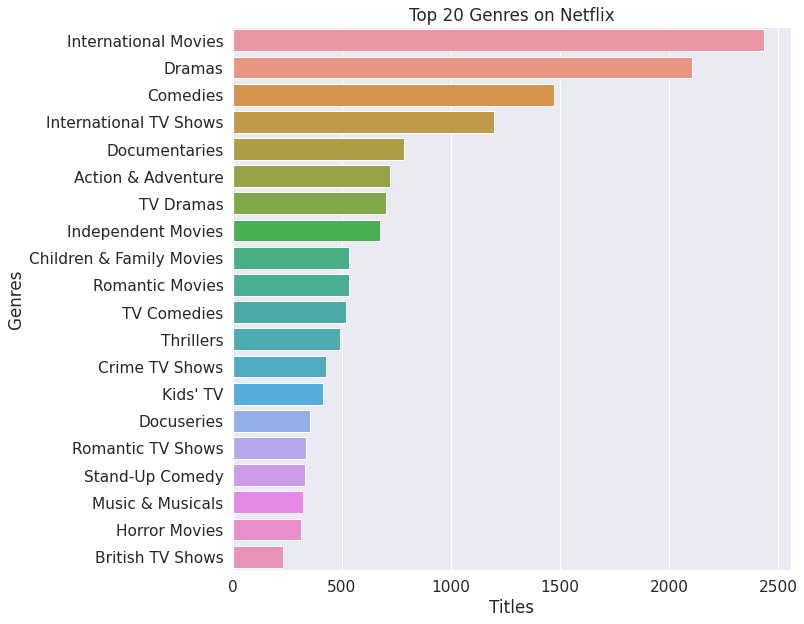

In [ ]:
#Extract the Genres
filtered_genres = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(10,10))

#Plot the count of top 20 genres
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

This shows the top 20 Genres available in the Netflix dataset.

# Top 10 Actors

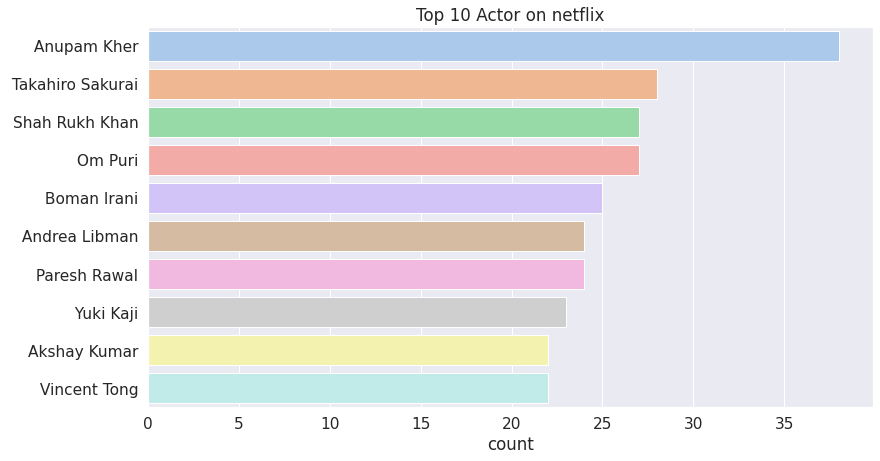

In [ ]:
#Extract the list of Actors
filtered_cast_shows = df[df.cast != 'No Cast'].set_index('title').cast.str.split(',', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))

#Plot the count of Top 10 Actors
plt.title('Top 10 Actor on netflix')
sns.countplot(y = filtered_cast_shows, order=filtered_cast_shows.value_counts().index[:10], palette='pastel')
plt.show()

Whatever listings are present in the dataset, out of that Anupam Kher seems to be part of cast in a lot of movies followed by Takahiro Sakurai.

In [ ]:
data=data.reset_index(drop=True)

In [ ]:
data.drop(['show_id'],inplace=True,axis=1)

In [ ]:
# Encoding columns
x = data[['type','director','country','release_year','rating']]


from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels 
for column in x:
  x[column]= label_encoder.fit_transform(x[column])
 
x.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


type  director  country  release_year  rating
0     1      2714       39            71       8
1     0      1839      309            67       8
2     0      1288      380            62       5
3     0      3444      550            60       4
4     0      3175      550            59       4

We encoded the columns to convert them to numerical type for fitting in diffrent clustering models.

In [ ]:
# Pre-processing of text column
def preprocess_text(text):
    text = remove_punctuation(text)
    text = text.lower()
    text = text.strip()
    tokens = toknizing(text)
    pos_tags = pos_tag(tokens)
    lemmatiser = WordNetLemmatizer()
    tokens = [lemmatiser.lemmatize(t.lower()) for t, p in pos_tags]
    return tokens

#Function to remove punctuations
def remove_punctuation(text):
     punctuations = '''!()-[]{};:'",./?@#$%^+&*_~'''
     no_punct = ""
     for char in text:
        if char not in punctuations:
            no_punct = no_punct + char
     return no_punct
#Function to create word tokens
def toknizing(text):
  stop_words = set(stopwords.words('english'))
  tokens = word_tokenize(text)
  result = [i for i in tokens if not i in stop_words]
  return result    

The above functions would help us for pre-processing for text based columns like description

In [ ]:
# pre-processing for description and listed_in
data['description'] = data['description'].apply(lambda x: ' '.join(preprocess_text(x)))
data['listed_in'] = data['listed_in'].apply(lambda x: ' '.join(preprocess_text(x)))
data.head()

type  title           director  \
0  TV Show     3%        No Director   
1    Movie   7:19  Jorge Michel Grau   
2    Movie  23:59       Gilbert Chan   
3    Movie      9        Shane Acker   
4    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                          listed_in  \
0   international tv show tv drama tv scifi fantasy   
1                         drama international movie   
2                  horror movie international movie   
3  action adventure independent movie scifi fantasy   
4                                             drama   

                                         description  
0  future elite inhabit island paradise far crowd...  
1  devastating earthquake hit mexico city trapped...  
2  army recruit found dead fellow soldier forced ...  
3  postapocalyptic world ragdoll robot hide fear ...  
4  brilliant group student become cardcounting ex...

# **5. Generate Word embeddings**

In [ ]:
# Universal sentence encoder
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" 
model = hub.load(module_url)
print ("module %s loaded" % module_url)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [ ]:
# Create embeddings
sentence_embeddings = model(data['description'])
description_embeddings=pd.DataFrame(sentence_embeddings.numpy())

We use the Universal sentence encoder to create word embeddings for sentences in the description column. It will have 512 dimiensions. Then we convert it to a DataFrame.

In [ ]:
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

In [ ]:
## Find sim between aa sentence and sent in df
query = "army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret"
query_vec = model([query])[0]

list_sim=[]
for sent in data['description']:
  sim = cosine(query_vec, model([sent])[0])
  #print("Sentence = ", sent, "; similarity = ", sim)
  list_sim.append([sent,sim])

In [ ]:
sim_df=pd.DataFrame(list_sim,columns=['sentence','sim'])
sim_df.sort_values(by=['sim','sentence'],axis=0,inplace=True,ascending=[False,True])

# **Choose right number of clusters**

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:255: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  "Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'WCSS')

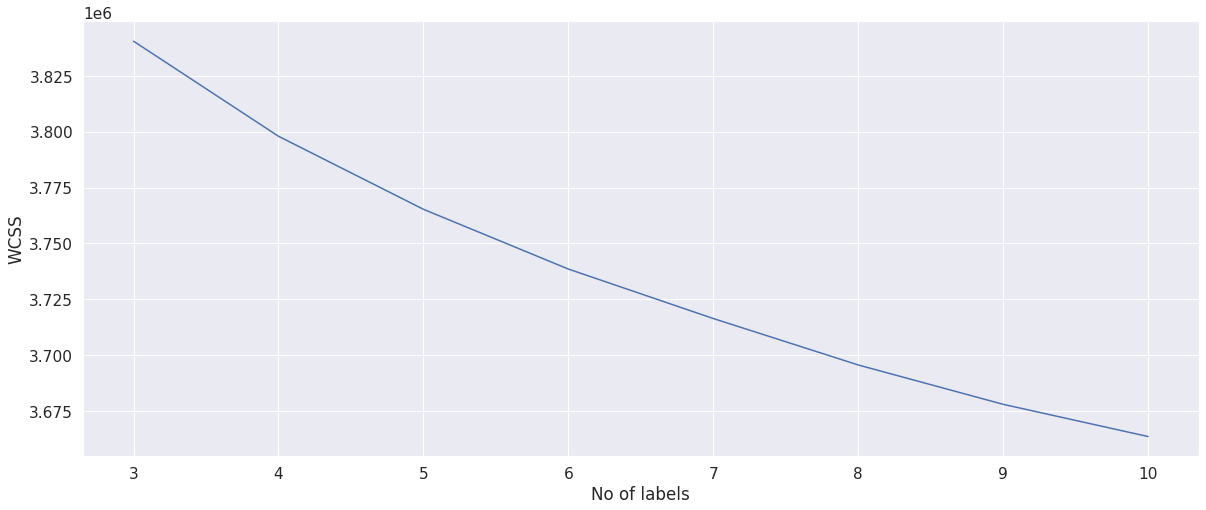

In [ ]:
# Scaling data
x_scaled_emb = preprocessing.scale(description_embeddings)

rcParams['figure.figsize'] = 20,8

wcss = []

for i in range(3,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42);
    kmeans.fit(x_scaled_emb);
    wcss.append(kmeans.inertia_)
    
sns.lineplot(range(3,11), wcss);
plt.xlabel('No of labels')
plt.ylabel('WCSS')

To check the number of clusters possible, we plot the elbow curve for the embeddings matrix for the column decsription. Not much can be observed from the plot as it is almost a straight line.

# **TSNE representation**

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


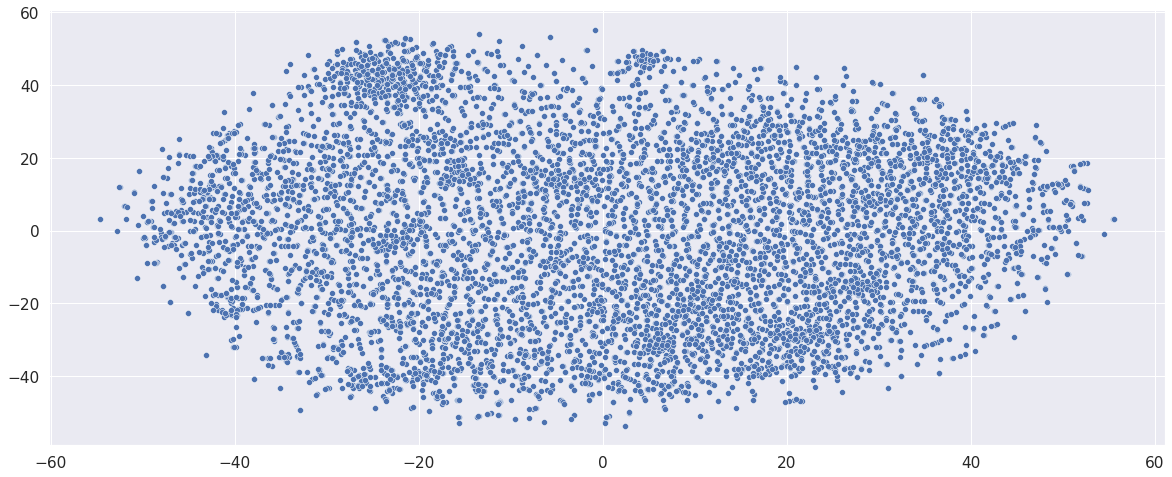

In [ ]:
X_tsne_emb = TSNE(learning_rate=50).fit_transform(x_scaled_emb)

rcParams['figure.figsize'] = 20,8
sns.scatterplot(X_tsne_emb[:, 0], X_tsne_emb[:, 1])

T-sne plot only for the embeddings created

In [ ]:
data_tsne = pd.DataFrame({'d1': X_tsne_emb[:, 0], 'd2': X_tsne_emb[:, 1]})

In [ ]:
# Cobine features listed_in and description
df_listed_desc=data['listed_in']+' '+data['description']
df_listed_desc.head()

0    international tv show tv drama tv scifi fantas...
1    drama international movie devastating earthqua...
2    horror movie international movie army recruit ...
3    action adventure independent movie scifi fanta...
4    drama brilliant group student become cardcount...
dtype: object

A new dataframe is created by concatting the columns listed_in and description. This dataframe would be used to create word embeddings.

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:255: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  "Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'WCSS')

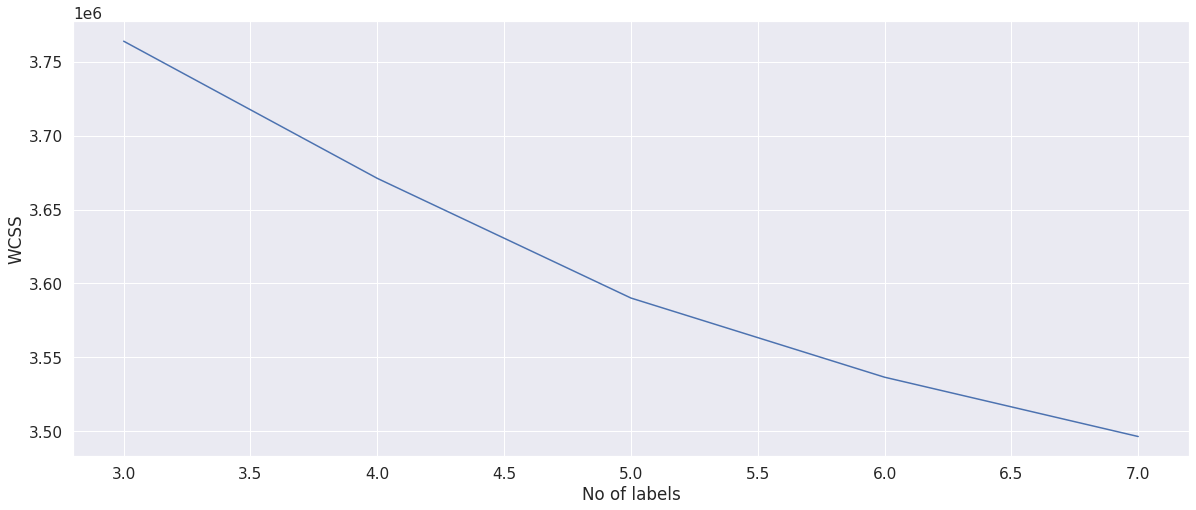

In [ ]:
# Create embeddings
desc_list_embeddings = model(df_listed_desc)
df_desc_list_embeddings=pd.DataFrame(desc_list_embeddings.numpy())
# Scale the matrix of embeddings data
scaled_desc_emb = preprocessing.scale(df_desc_list_embeddings)

rcParams['figure.figsize'] = 20,8

wcss = []

for i in range(3,8):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scaled_desc_emb)
    wcss.append(kmeans.inertia_)
    
sns.lineplot(range(3,8), wcss);
plt.xlabel('No of labels')
plt.ylabel('WCSS')

Using the new dataframe we crate the word embeddings again. We use kmeans to compute the wcss and then plot the elbow curve. We observe a curve at 5. 

In [ ]:
# Columns and embeddings merged
df_merged=pd.merge(x,df_desc_list_embeddings,left_index=True, right_index=True)

Here we merge the previously encoded columns with the new dataframe for embeddings. We use the index to merge to merge as we do not have any common column.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'WCSS')

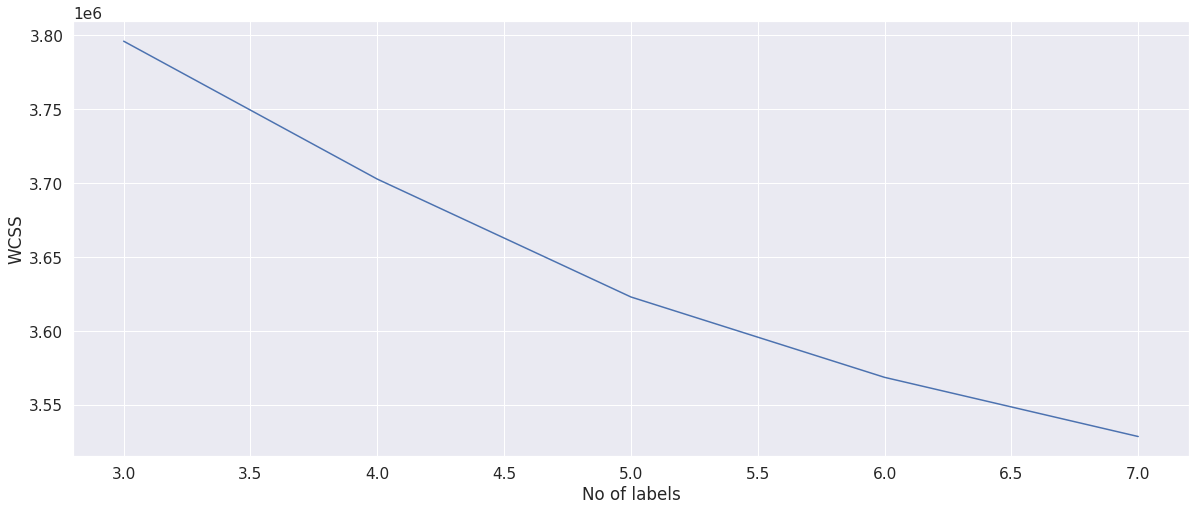

In [ ]:
# Scale the data
scaled_df_merged = preprocessing.scale(df_merged)

rcParams['figure.figsize'] = 20,8

wcss2 = []

for i in range(3,8):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scaled_df_merged)
    wcss2.append(kmeans.inertia_)
    
sns.lineplot(range(3,8), wcss2);
plt.xlabel('No of labels')
plt.ylabel('WCSS')

Again with the new dataset we use Kmeans to obtain wcss and plot the elbow curve. We observe a curve at 5. so, we proceed with five number of clusters for our data.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


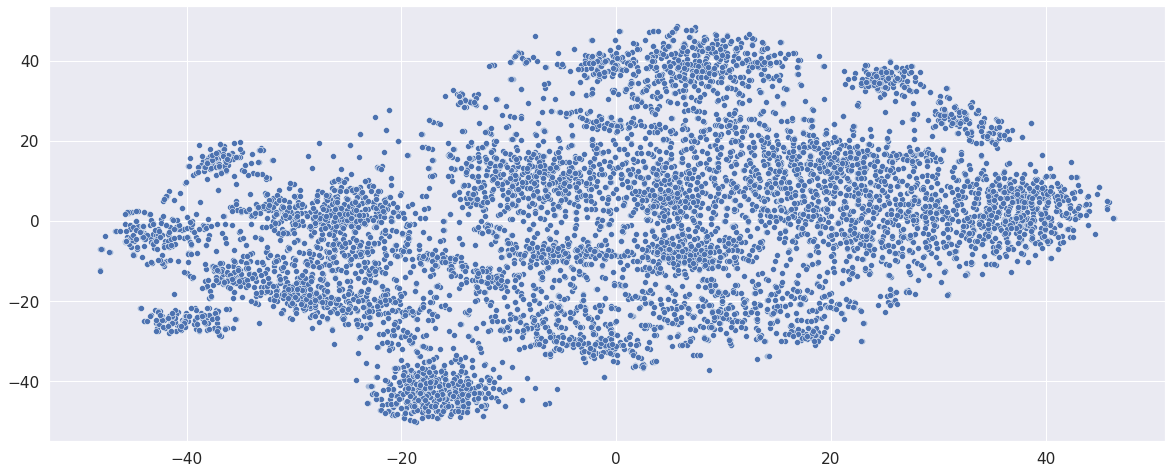

In [ ]:
# Define TSNE
tsne_all = TSNE(learning_rate=50).fit_transform(scaled_df_merged)

rcParams['figure.figsize'] = 20,8
sns.scatterplot(tsne_all[:, 0], tsne_all[:, 1])

Using TSNE we plot the data points in two dimensions. The plot gives us an idea of the points where the clusters could be.

In [ ]:
#Convert to DataFrame
tsne_all = pd.DataFrame({'d1': tsne_all[:, 0], 'd2': tsne_all[:, 1]})

The TSNE results are stored in a dataframe, We will add columns for the clustering model we implement and these columns can be used to give hue to the data points. It would make easy for us to identify the clusters.

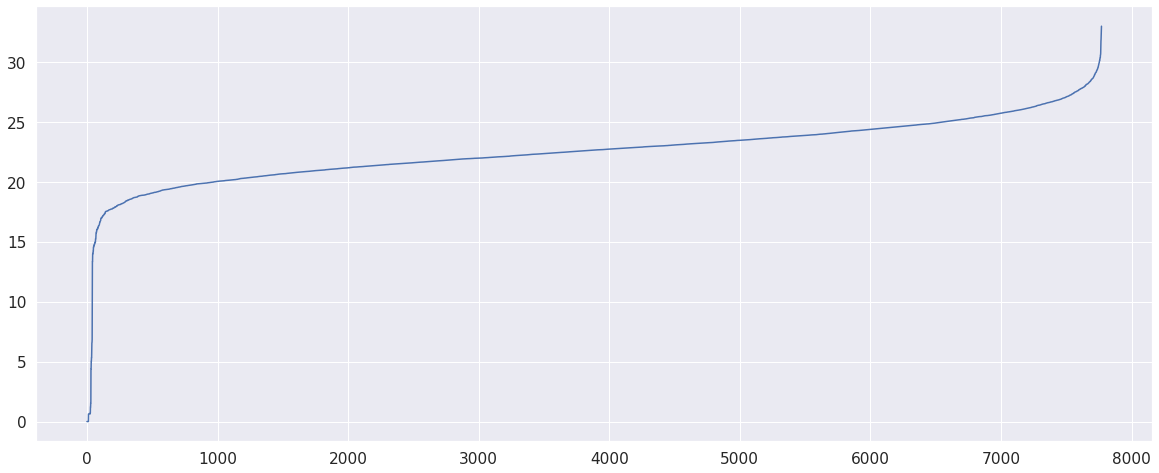

In [ ]:


neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(scaled_df_merged)
distances, indices = neighbors_fit.kneighbors(scaled_df_merged)

#Step 3: Sort distance values by ascending value and plot

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

# **6. Define Model and create clusters**

# **DBSCAN**

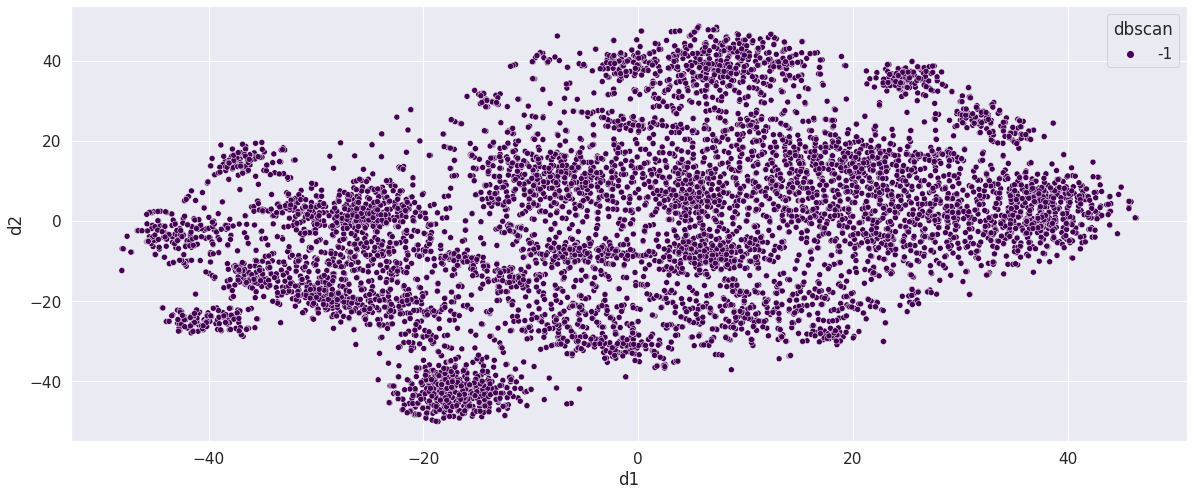

In [ ]:
# Define DBSCAN model
model_dbscan = DBSCAN(eps=1,algorithm='ball_tree',metric='minkowski',leaf_size=100, p=2)
tsne_all['dbscan'] = model_dbscan.fit_predict(scaled_df_merged)
sns.scatterplot(data=tsne_all, x='d1', y='d2', hue='dbscan', palette='viridis')

Using DBSCAN we observe it is not able to mark the clusters

# **Mean Shift**

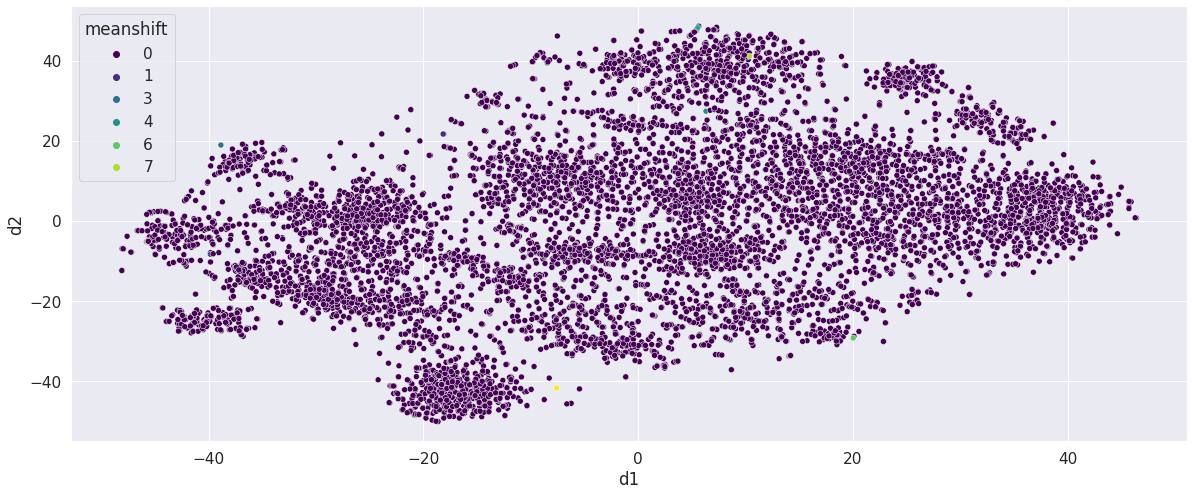

In [ ]:

# Define the model
bandwidth = estimate_bandwidth(scaled_df_merged, quantile=0.2, n_samples=500)
model = MeanShift(bandwidth=bandwidth)
# fit model and predict clusters
tsne_all['meanshift'] = model.fit_predict(scaled_df_merged)

sns.scatterplot(data=tsne_all, x='d1', y='d2', hue='meanshift', palette='viridis')

# **Agglomerative clustering**

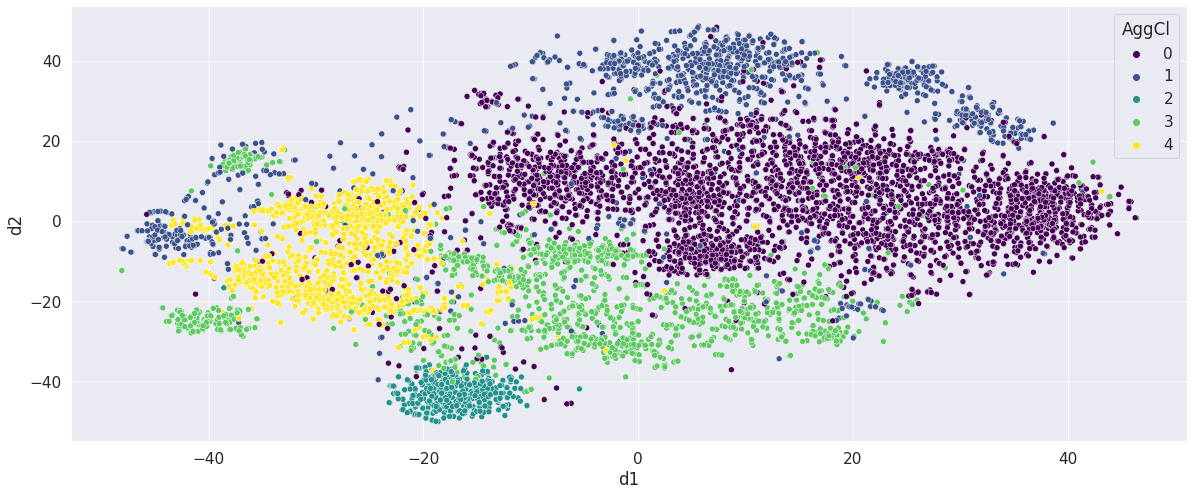

In [ ]:
#Define model
model = AgglomerativeClustering(n_clusters = 5)
tsne_all['AggCl'] = model.fit_predict(scaled_df_merged)

sns.scatterplot(data=tsne_all, x='d1', y='d2', hue='AggCl', palette='viridis')


The Agglomerative clustering gives us a good visual markers for the clusters, but we can observe the green and blue marked points are not well defined in this.

# **KMeans**

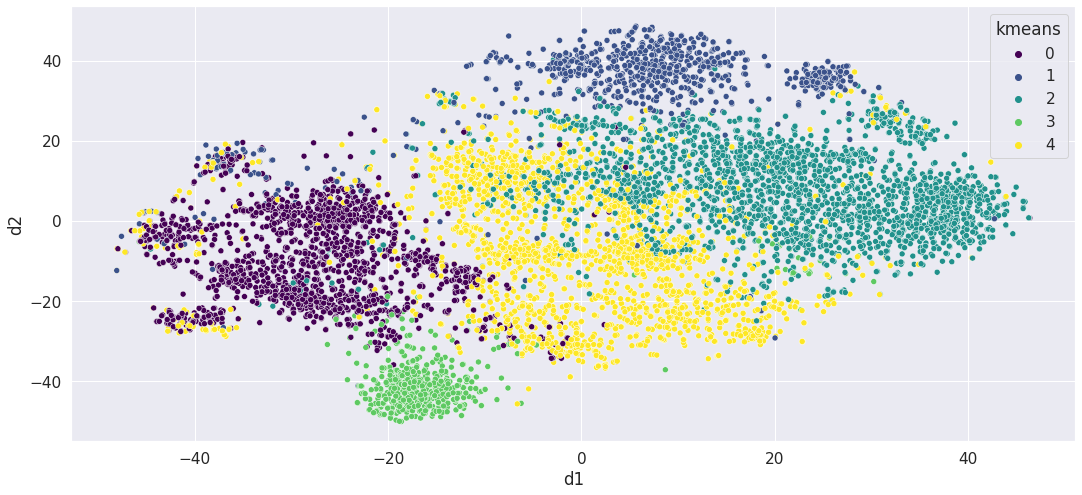

In [ ]:
#Define model
kmeans_model = KMeans(5,init='k-means++')
kmeans_model.fit(scaled_df_merged)
tsne_all['kmeans']=kmeans_model.fit_predict(scaled_df_merged)

rcParams['figure.figsize'] = 18,8
sns.scatterplot(data=tsne_all, x='d1', y='d2', hue='kmeans', palette='viridis')

With Kmeans also we get well separated clusters with some overlap in the points marked in blue and yellow.

# **BIRCH**

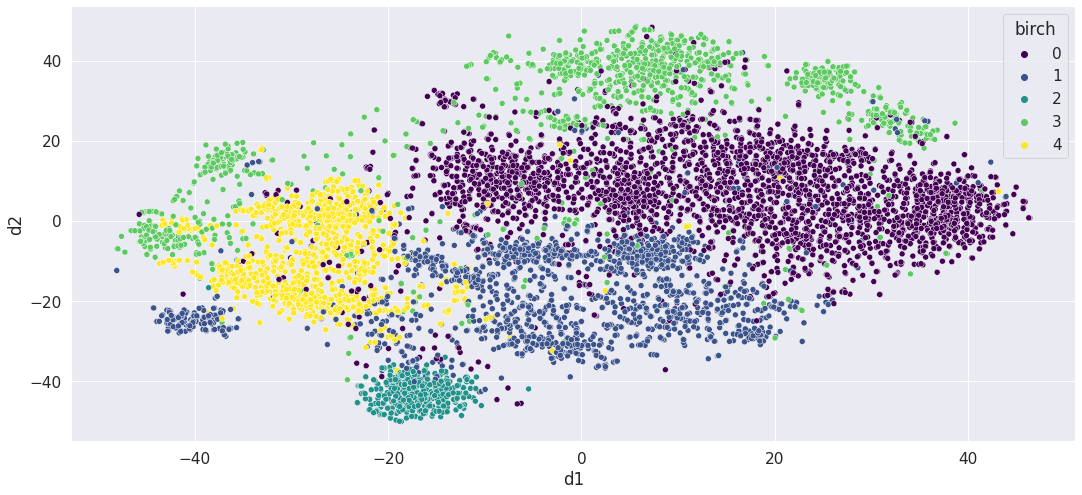

In [ ]:
#Define model
model_birch = Birch(threshold=0.01, n_clusters=5)
model_birch.fit(scaled_df_merged)
tsne_all['birch'] = model_birch.predict(scaled_df_merged)
rcParams['figure.figsize'] = 18,8
sns.scatterplot(data=tsne_all, x='d1', y='d2', hue='birch', palette='viridis')

The BIRCH model also gives a good estimate of clusters. The points marked in light green is very spread out.

In [ ]:

# model_spec = SpectralClustering( n_clusters=5,eigen_solver='lobpcg',n_jobs=4)
# model_spec.fit(scaled_df_merged)
# tsne_all['SpecCl'] = model_spec.predict(scaled_df_merged)
# rcParams['figure.figsize'] = 18,8
# sns.scatterplot(data=tsne_all, x='d1', y='d2', hue='SpecCl', palette='viridis')

# **Gaussian Mixture**

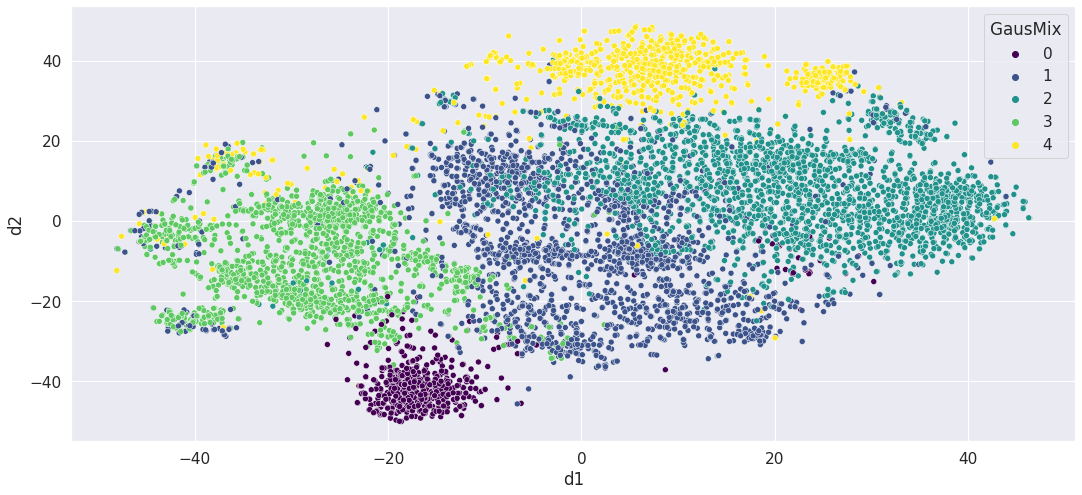

In [ ]:
# define the model
model_gaus = GaussianMixture(n_components=5)
model_gaus.fit(scaled_df_merged)
tsne_all['GausMix'] = model_gaus.predict(scaled_df_merged)
rcParams['figure.figsize'] = 18,8
sns.scatterplot(data=tsne_all, x='d1', y='d2', hue='GausMix', palette='viridis')

The Gaussian Mixture model also does a decent job in identying the clusters. But, the centrally located points are overlapping.

# **OPTICS**

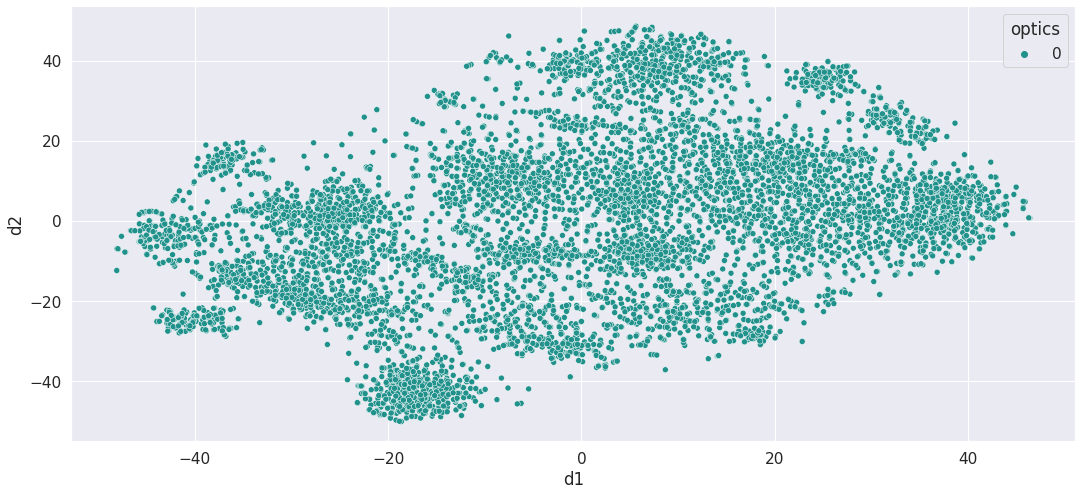

In [ ]:
# define the model
model_opt =OPTICS(eps=0.8, min_samples=10) # GaussianMixture(n_components=5)
tsne_all['optics'] =model_opt.fit_predict(scaled_df_merged)
#tsne_all['optics'] = model_opt.predict(scaled_df_merged)
rcParams['figure.figsize'] = 18,8
sns.scatterplot(data=tsne_all, x='d1', y='d2', hue='optics', palette='viridis')

With OPTICS we observer the model is not able to segregate the clusters.

# **MiniBatch KMeans**

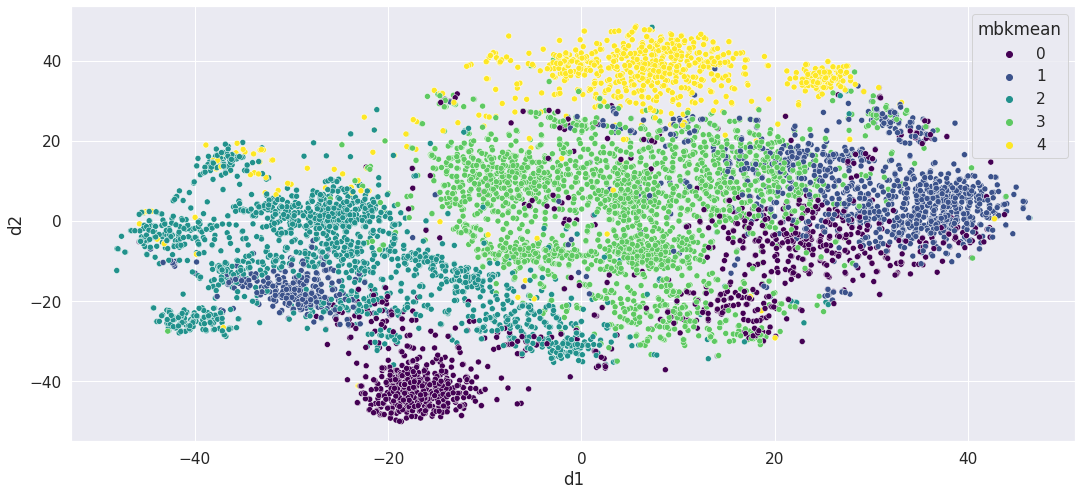

In [ ]:
# define the model
model_mbkmean =MiniBatchKMeans(n_clusters=5) #OPTICS(eps=0.8, min_samples=10) # GaussianMixture(n_components=5)
model_mbkmean.fit(scaled_df_merged)
tsne_all['mbkmean'] = model_mbkmean.predict(scaled_df_merged)
rcParams['figure.figsize'] = 18,8
sns.scatterplot(data=tsne_all, x='d1', y='d2', hue='mbkmean', palette='viridis')

MiniBatch Kmeans also identifes the clusters but the points marked in point seem to overlap with other cluster.

# **7. Conclusion**

From the diffrent clutering algorithms we trained our data on, DBSCAN and Mean Shift seems to be not able to properly cluster the data. Agglomorative Clustering, BIRCH, KMeans and Gaussina mixture does a good job on identifying the clusters. So these models can be used for Future work to further tune and produce better results.